# 載入常用程式庫及常數定義

In [ ]:

!pip install --upgrade gdown==5.1.0
!pip install --upgrade scikit-learn==1.1.3
!pip install --upgrade matplotlib==3.4.1

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.4.1-cp310-cp310-linux_x86_64.whl size=10425914 sha256=b35ae627890108f6b525cdb65651b0d751e3bcb5c543890a76dfe6006cb2cabe
  Stored in directory: /root/.cache/pip/wheels/4d/84/33/44631b04443c528df9a892f4f274e319c81c8b15fa6c37bb4c
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mizani 0.9.3 requires matplotlib>=3.5.0, but you have matplotlib 3.4.1 which 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 20.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.23.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.


In [ ]:
try:
    from google.colab import drive, files
    in_colab = True
except ModuleNotFoundError:
    in_colab = False

if in_colab:
    home_dir = ''
    drive.mount('/content/drive')
    groot_dir = '/content/drive/My Drive/adventures/'
else:
    from pathlib import Path
    home_dir = str(Path.home())
    groot_dir = home_dir + '/Google Drive/adventures/'

import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('font', size=14)

from datetime import datetime
from dateutil.relativedelta import *
import matplotlib.pyplot as plt
import sklearn
assert sklearn.__version__ >= "0.20"
import seaborn as sns
import pandas as pd
import numpy as np
import math
import os
import sys
import gdown
import requests
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
from pandas.plotting import register_matplotlib_converters

figure_dir = groot_dir + 'regression/'
data_dir = groot_dir + 'regression/'

gfigure = lambda name: figure_dir + name + '.png'
output_fig = lambda name: plt.savefig( gfigure(name), dpi = 300)

local_time = lambda x, offset: x + relativedelta(hours= offset)
def local_now(hours = 8):
    return datetime.now() + relativedelta(hours = hours if in_colab else 0)

def print_now():
    return print(local_now())

def print_local_now():
    return print('Local Time:', local_now())

def DropboxLink(did, fname):
    return 'https://dl.dropboxusercontent.com/s/%s/%s' % \
    (did, fname)

def fetch_gdrive_file(fid, local_save):
    remote_url = 'https://drive.google.com/uc?id=' + fid
    gdown.download(remote_url, local_save, quiet = False)

def fetch_file_via_requests(url, save_in_dir):
    local_filename = url.split('/')[-1]
    # NOTE the stream=True parameter below
    output_fpath = save_in_dir + local_filename
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(output_fpath, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)
                    # f.flush()
    return output_fpath

def acct_string(num):
    s0 = str(num)
    if len(s0) <=3:
        return s0
    num_section = int(len(s0)/3)
    remaining_start = len(s0) % 3
    s = s0[:remaining_start]
    for i in range(num_section):
        s += ',%s' % s0[remaining_start + i*3 :remaining_start + (i+1)*3]
    return s

EX5DATA = '1qdQFD3WwMYXOrsHLBbKMa9QF3Ac94Sny'
EX1DATA = '1R7kC0-heNp5xVPi7xPXSlXqaiOZBiZjw'
EX1DATA2 = '1mXIISqYX_YBN28tYMlC1pJZIOBLRK5l2'
ADVER = '1HykmuI3PdveXa6-_bMhLk_uJ36c-OfJt'
TAIWAN_CSV = '1DKARcXADdLW5XkRuTqMhpRF97is0QrUK'


print('\nRunning on %s' % sys.platform)
print('Python Version', sys.version)
print('Data storage points to ==>', data_dir)

print('\nThis module is amied to leran regression basics...')
print('\nLibraries and dependenciess imported')
print_local_now()

Mounted at /content/drive

Running on linux
Python Version 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
Data storage points to ==> /content/drive/My Drive/adventures/regression/

This module is amied to leran regression basics...

Libraries and dependenciess imported
Local Time: 2024-03-13 21:00:03.452877


# 練習資料從哪裏來？

- [UCI regression datasets](https://archive.ics.uci.edu/ml/datasets.php?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table)
- [sklearn datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)
- [sklearn: Generated Datasets](https://scikit-learn.org/stable/datasets/index.html#sample-generators)
    - [sklearn: make_gression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression)

## make_regression

- [make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html?highlight=make_regression#sklearn.datasets.make_regression)

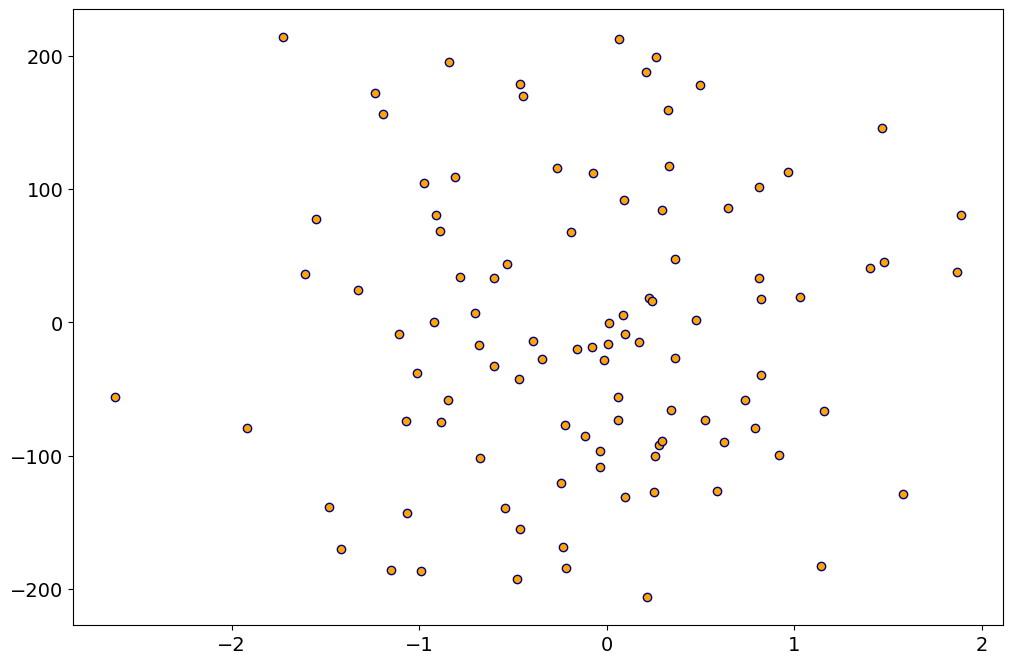

In [ ]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

X0, y = make_regression(n_samples = 100, n_features = 2,
    bias = 0.1, noise = 0.1, random_state = 42)
X = np.sort(X0[:,0]).reshape(-1,1)

fig,ax = plt.subplots(figsize=(12, 8), dpi=100)
plt.scatter(X, y, color='orange', edgecolor='navy')

## create dataset on your own

- [numpy rand](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html?highlight=rand#numpy.random.rand)
- [numpy randn](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html?highlight=randn#numpy.random.randn)

(100, 1)


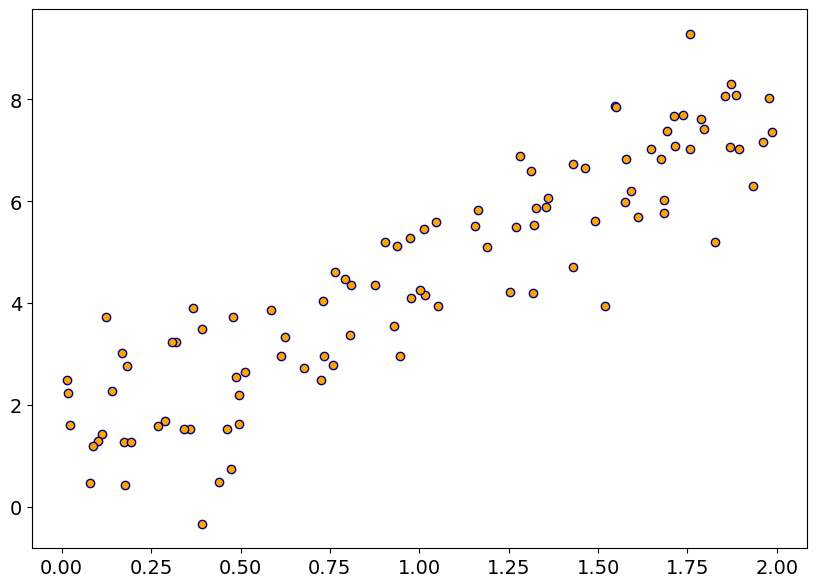

In [ ]:
import numpy as np

X = 2 * np.random.rand(100, 1)  # range[0..2]
y = 1.6 + 3 * X + np.random.randn(100, 1)

X_new = np.array([[0], [2]])

# print(X_new)
_, ax = plt.subplots(figsize=(10, 7), dpi=100)
ax.scatter(X,y, color = 'orange', edgecolor = 'navy')
print(X.shape)

## sklearn load_data() utilities

- [sklearn: Generated Datasets](https://scikit-learn.org/stable/datasets/index.html#sample-generators)
- [load_boston](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston)

In [ ]:
from sklearn.datasets import load_boston
data = load_boston()
X,y = data['data'], data['target']

print(X.shape, y.shape)

(506, 13) (506,)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

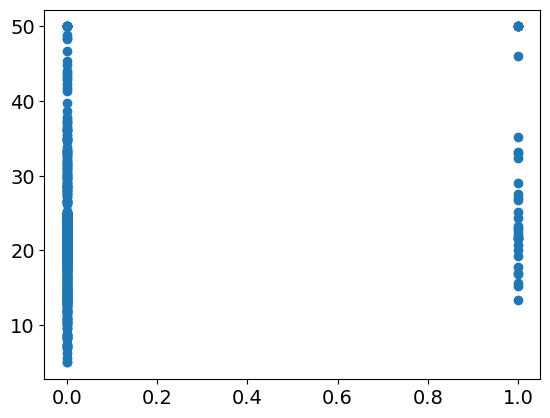

In [ ]:
plt.scatter(X[:,3],y)

## Data used in keynote

In [ ]:
from scipy.io import loadmat
import statsmodels.api as sm

simple_x = np.array([2,9,5,5,3,7,1,8,6,2],dtype=np.float64)
simple_y = np.array([69,98,82,77,71,84,55,94,84,64],dtype=np.float64)

#
# for polynomial regression
#
poly_x = np.array([2, 9, 5, 5, 3, 7, 1, 8, 6, 2 ], dtype = np.float64)
poly_y = np.array([69, 92, 82, 72, 71, 84, 40, 94, 88, 59], dtype = np.float64)

wiki_x = np.array([1.47, 1.50, 1.52,1.55, 1.57,
              1.60, 1.63, 1.65, 1.68, 1.70,
              1.73, 1.75, 1.78, 1.80, 1.83 ], dtype = np.float64)
wiki_y = np.array([52.21, 53.12, 54.48, 55.84, 57.20,
             58.57, 59.93, 61.29, 63.11, 64.47,
             66.28, 68.1, 69.92, 72.19, 74.46],
            dtype = np.float64)


fetch_gdrive_file(EX5DATA, os.path.join(data_dir, 'ex5datam1.mat'))
awdata = loadmat( os.path.join(data_dir, 'ex5datam1.mat'))

# # Load from ex5data1.mat, where all variables will be store in a dictionary

# # Extract train, test, validation data from dictionary
# # and also convert y's form 2-D matrix (MATLAB format) to a numpy vector
aw_x, aw_y = np.array(awdata['X']), np.array(awdata['y'])
aw_xtest, aw_ytest = np.array(awdata['Xtest']), np.array(awdata['ytest'])
aw_xval, aw_yval = np.array(awdata['Xval']), np.array(awdata['yval'])

Downloading...
From (original): https://drive.google.com/uc?id=1qdQFD3WwMYXOrsHLBbKMa9QF3Ac94Sny
From (redirected): https://drive.usercontent.google.com/download?id=1qdQFD3WwMYXOrsHLBbKMa9QF3Ac94Sny&confirm=t&uuid=546ac64e-d1ce-4cb8-9aa9-a57e84f33208
To: /content/drive/My Drive/adventures/regression/ex5datam1.mat
100%|██████████| 1.32k/1.32k [00:00<00:00, 638kB/s]


## Download UCI files

In [ ]:
sample_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'

In [ ]:
import zipfile, gzip, shutil

#
# Input:
#    zip_file   : the compressed file ended with '.zip' or '.gz'
#    extract_to: the directory you want to put uncompressed file
#
#          Note that extract_to must be ended with '/'
#
def ungzip(zip_file, extract_to):
    gzfile = zip_file.split('/')[-1]
    new_name = os.path.join(extract_to, gzfile.split('.')[0])
    print('new name=', new_name)
    with gzip.open(zip_file, 'rb') as f_in:
        with open(new_name, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

def unzip(zip_file, extract_to):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

def my_downloader(remote_url, extrac_to):
    fetch_file_via_requests(remote_url, extrac_to)
    local_name = remote_url.split('/')[-1]
    file_ext = remote_url.split('.')[-1]
    if (file_ext == 'zip'):
        unzip(os.path.join(extrac_to, local_name), data_dir)
    elif (file_ext == 'gz') or (file_ext == 'gzip'):
        ungzip(os.path.join(extrac_to, local_name), data_dir)

my_downloader(sample_url, data_dir)
print(f'data downloaded and stored in {data_dir}')

data downloaded and stored in /content/drive/My Drive/adventures/regression/


# 套件 sklearn & statsmodels

In [ ]:
from sklearn.datasets import load_boston
data = load_boston()
X,y = data['data'], data['target']

print(X.shape, y.shape)

(506, 13) (506,)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

## sklearn.linear_model.LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
linr = LinearRegression()

linr.fit(X, y)

print(linr.coef_, linr.intercept_)

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01] 36.45948838509002


In [ ]:
from sklearn.metrics import r2_score
yhat = linr.predict(X)
r2 = r2_score(y, yhat)
print(r2)

0.7406426641094095


## statsmodels ols

- [add_constant](https://www.statsmodels.org/stable/generated/statsmodels.tools.tools.add_constant.html)
- [OLS](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html)

- before
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{pmatrix}
- after
\begin{pmatrix}
1 & 1 & 2 & 3 \\
1 & 4 & 5 & 6 \\
1 & 7 & 8 & 9
\end{pmatrix}

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

def simple_ols(xvec, yvec):
    Xadd = sm.add_constant(xvec)
    model = sm.OLS(yvec, Xadd).fit()
    return model

In [ ]:
ols = simple_ols(X, y)
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          6.72e-135
Time:                        12:31:25   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
x1            -0.1080      0.033     -3.287      0.001      -0.173      -0.043
x2             0.0464      0.014      3.382      0.001       0.019       0.073
x3             0.0206      0.061      0.334      0.738      -0.100       0.141
x4             2.6867      0.862      3.118      0.002       0.994       4.380
x5           -17.7666      3.820     -4.651      0.000     -25.272     -10.262
x6             3.8099      0.418      9.116      0.000       2.989       4.631
x7             0.0007      0.013      0.052      0.958      -0.025       0.027
x8            -1.4756      0.199     -7.398      0.000      -1.867      -1.084
x9             0.3060      0.066      4.613      0.000       0.176       0.436
x10           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
x11           -0.9527      0.131     -7.283      0.000      -1.210      -0.696
x12            0.0093      0.003      3.467      0.001       0.004       0.015
x13           -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
ols.params, len(ols.params), ols.rsquared

(array([ 3.64594884e+01, -1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
         2.68673382e+00, -1.77666112e+01,  3.80986521e+00,  6.92224640e-04,
        -1.47556685e+00,  3.06049479e-01, -1.23345939e-02, -9.52747232e-01,
         9.31168327e-03, -5.24758378e-01]),
 14,
 0.7406426641094095)

## Normal Equation

$\theta = (X^TX)^{-1}(X^Ty)$

```
X_b = np.c_[np.ones((len(X), 1)), X]
```
的目的是?
- before
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{pmatrix}
- after
\begin{pmatrix}
1 & 1 & 2 & 3 \\
1 & 4 & 5 & 6 \\
1 & 7 & 8 & 9
\end{pmatrix}

In [ ]:
X_b = np.c_[np.ones((len(X), 1)), X]  # add x0 = 1 to each instance

# X_b = np.append(np.ones((len(X), 1)),X,axis=1) # alternative way to do this

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([ 3.64594884e+01, -1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
        2.68673382e+00, -1.77666112e+01,  3.80986521e+00,  6.92224640e-04,
       -1.47556685e+00,  3.06049479e-01, -1.23345939e-02, -9.52747232e-01,
        9.31168327e-03, -5.24758378e-01])

# 如何畫散佈圖（scatter plot）？
- [Seaborn: regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html)
- [Matplotlib.axes.Axes.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html)

## simple scatter plot


- [sklearn.datasets.make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)

In [ ]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=2, bias=0.2,
    noise=0.2, random_state=42)

X = X[:, 0]

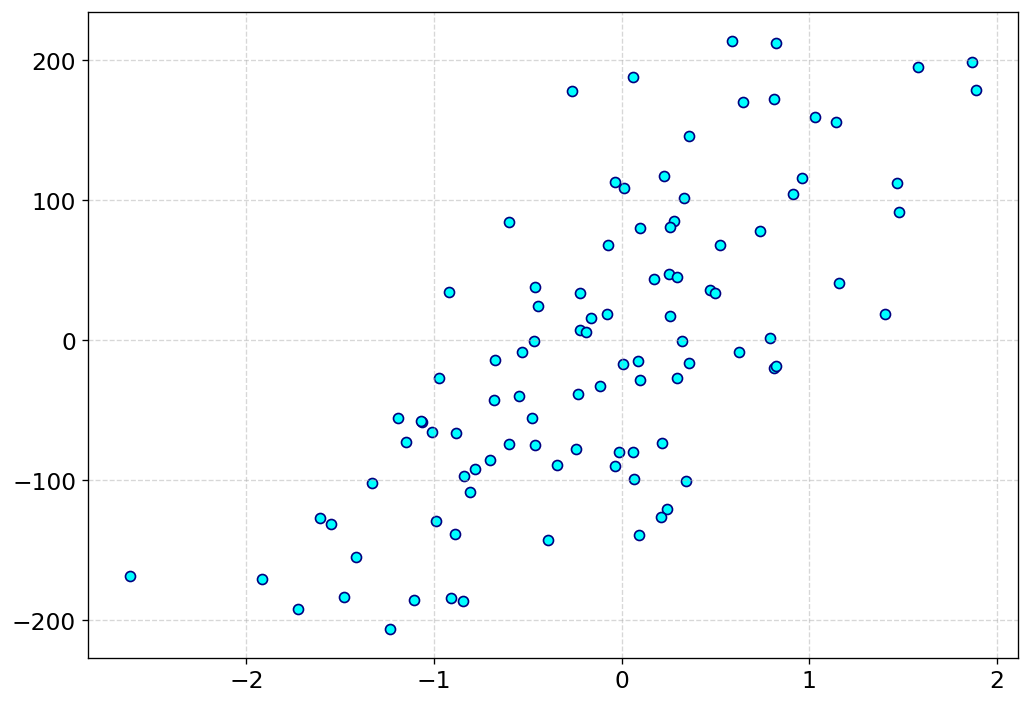

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7), dpi=120)
ax.scatter(X, y, color='cyan', edgecolor='navy')
ax.grid(b='on', ls='--', alpha=0.5)

output_fig('scatter demo 1')

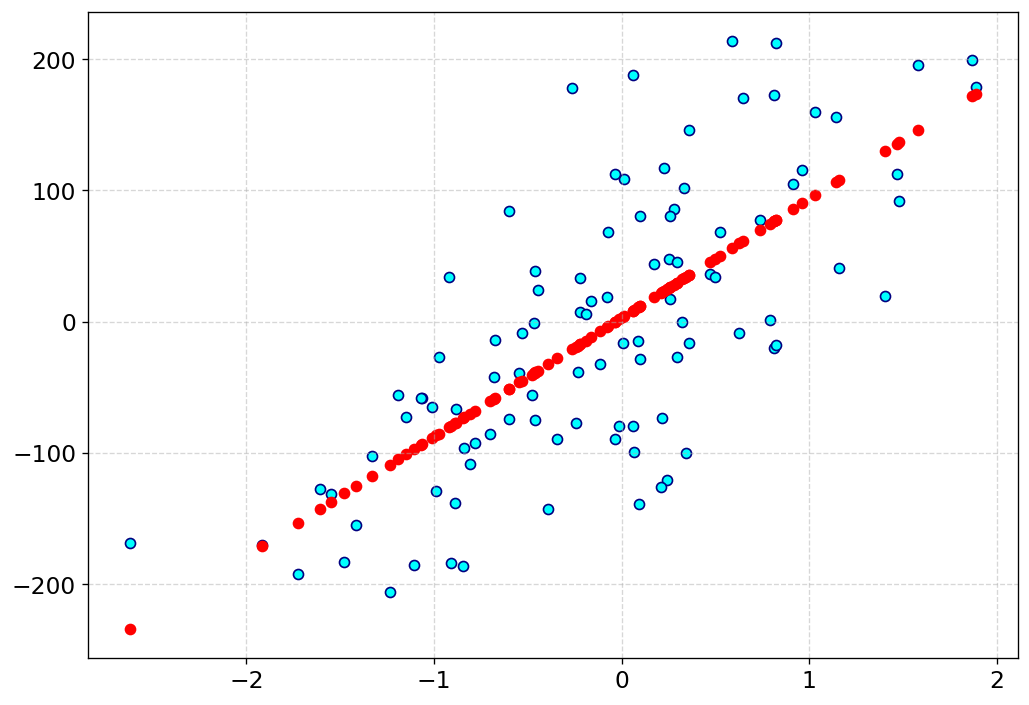

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = simple_ols(X, y)

fig, ax = plt.subplots(figsize=(10, 7), dpi=120)
ax.scatter(X, y, color='cyan', edgecolor='navy')
ax.scatter(X, model.fittedvalues, color = 'red')
ax.grid(b='on', ls = '--', alpha = 0.5)

## seaborn regplot

In [ ]:
fetch_gdrive_file(EX1DATA, os.path.join(data_dir, 'ex1data1.txt'))
df = pd.read_csv(os.path.join(data_dir, 'ex1data1.txt'), header=None)

Downloading...
From: https://drive.google.com/uc?id=1R7kC0-heNp5xVPi7xPXSlXqaiOZBiZjw
To: /content/drive/My Drive/adventures/regression/ex1data1.txt
100%|██████████| 1.36k/1.36k [00:00<00:00, 1.83MB/s]


In [ ]:
df.columns = ['x', 'y']
df

,x,y
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


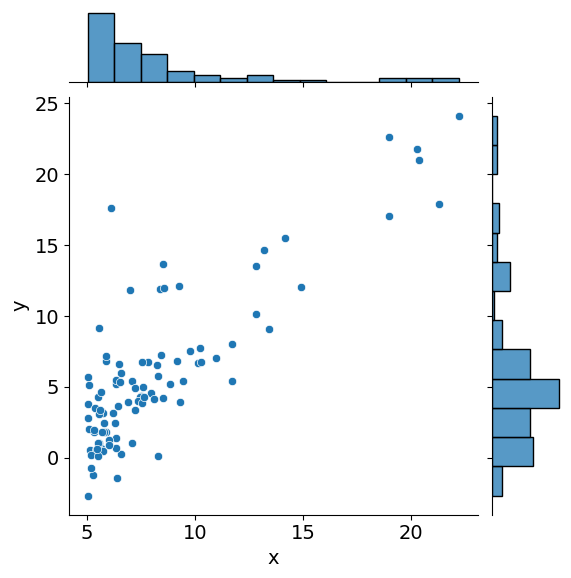

In [ ]:
sns.jointplot(x = 'x', y = 'y', data=df)

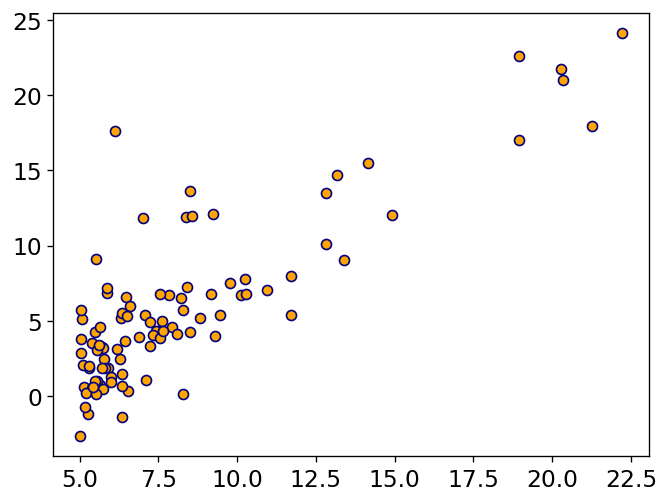

In [ ]:
fig = plt.figure(dpi=120)
plt.scatter(df.x, df.y, color='orange', edgecolor='navy')

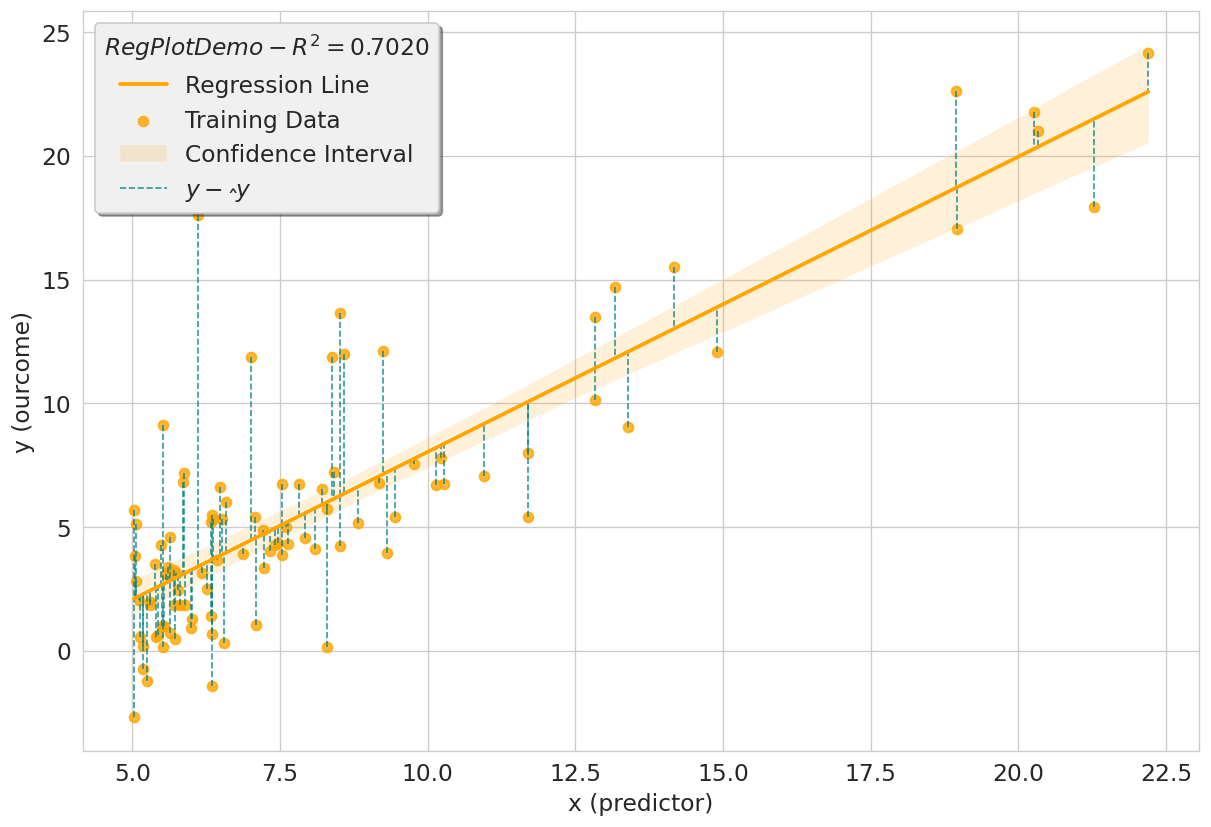

In [ ]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(12,8), dpi=120)

sns.regplot(x = df.x,y =  df.y, color = 'orange', ax=ax)

ols = simple_ols(df.x, df.y)

ax.vlines(df.x, df.y, ols.fittedvalues, color = 'teal', ls = '--',
    lw = 1, alpha = 0.8)

ax.set_xlabel('x (predictor)')
ax.set_ylabel('y (ourcome)')

ax.legend(['Regression Line',
           'Training Data',
           'Confidence Interval',
           r'$y - \hat y$'], loc='upper left',
          frameon=True, shadow=True,
          title = r'$RegPlot Demo - R^2=%.4f$' % ols.rsquared,
          facecolor = '#f0f0f0')

# Multivariate Regression

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

def simple_ols(xvec, yvec):
    Xadd = sm.add_constant(xvec)
    model = sm.OLS(yvec, Xadd).fit()
    return model

## CS229 Ex1-2

In [ ]:
#連結已失效
# fetch_file_via_requests(
#     DropboxLink('90gzmvbih77fhnk','ex1data2.txt'),data_dir)

In [ ]:
fetch_gdrive_file(EX1DATA2, os.path.join(data_dir, 'ex1data2.txt'))
df = pd.read_csv(os.path.join(data_dir, 'ex1data2.txt'), header=None)
df.tail()

Downloading...
From: https://drive.google.com/uc?id=1mXIISqYX_YBN28tYMlC1pJZIOBLRK5l2
To: /content/drive/My Drive/adventures/regression/ex1data2.txt
100%|██████████| 657/657 [00:00<00:00, 792kB/s]


,0,1,2
42,2567,4,314000
43,1200,3,299000
44,852,2,179900
45,1852,4,299900
46,1203,3,239500


In [ ]:
df.rename(columns={0:'X1', 1:'X2', 2:'y'},inplace = True)
df.tail()

,X1,X2,y
42,2567,4,314000
43,1200,3,299000
44,852,2,179900
45,1852,4,299900
46,1203,3,239500


<AxesSubplot:>

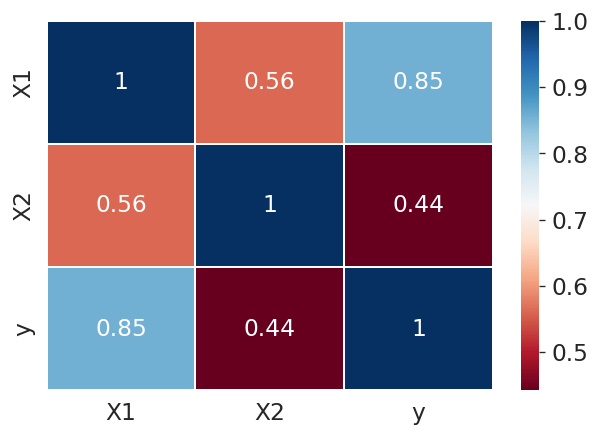

In [ ]:
fig, ax = plt.subplots(figsize=(6,4), dpi=120)
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidth=0.2,
            annot=True, cmap='RdBu', ax=ax)

In [ ]:
# model_1 = simple_ols(df.X1, df.y)

model_total = simple_ols(df.drop(['y'], axis = 1), df.y)

## load_boston()

In [ ]:
from sklearn.datasets import load_boston

data = load_boston()
X, y = data['data'], data['target']
X.shape, y.shape

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

((506, 13), (506,))

In [ ]:
df = pd.DataFrame(data = X, columns = data['feature_names'])
model = simple_ols(df, y)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          6.72e-135
Time:                        12:36:33   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

df = pd.DataFrame(data = X, columns = data['feature_names'])
model = simple_ols(df, y)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          6.72e-135
Time:                        12:36:36   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    106.814      0.0

## ISLR adver.csv

In [ ]:
#連結已失效
# fetch_file_via_requests(
#     DropboxLink('uev3kektwswh21c','adver.csv'),data_dir)

In [ ]:
ADVER = '1gpsq3E5UlX_0k9UDT1-pk0pzQIEyy_VV'
fetch_gdrive_file(ADVER, os.path.join(data_dir, 'adver.csv'))
adf = pd.read_csv(os.path.join(data_dir, 'adver.csv'), index_col=0)
adf.head()

Downloading...
From: https://drive.google.com/uc?id=1gpsq3E5UlX_0k9UDT1-pk0pzQIEyy_VV
To: /content/drive/My Drive/adventures/regression/adver.csv
100%|██████████| 4.55k/4.55k [00:00<00:00, 6.12MB/s]


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<AxesSubplot:>

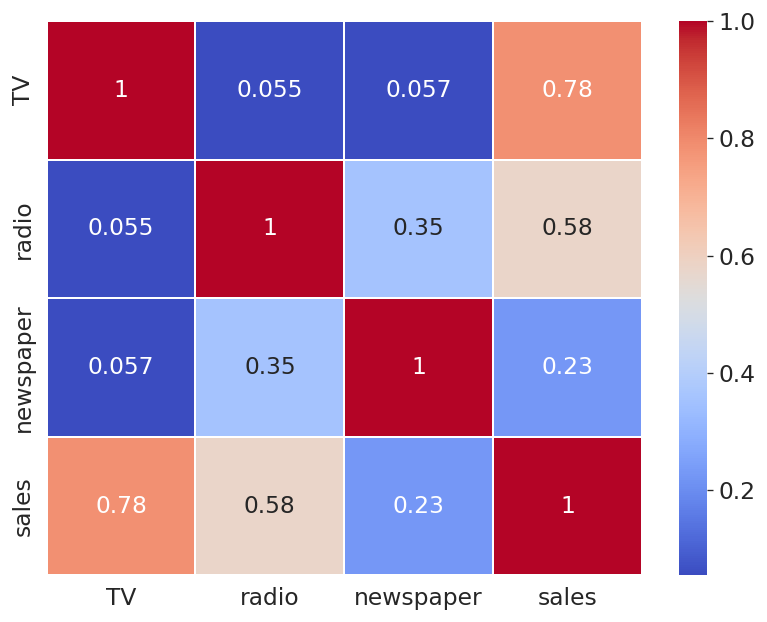

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=120)
corr = adf.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidth=0.2, annot=True, cmap='coolwarm', ax=ax)

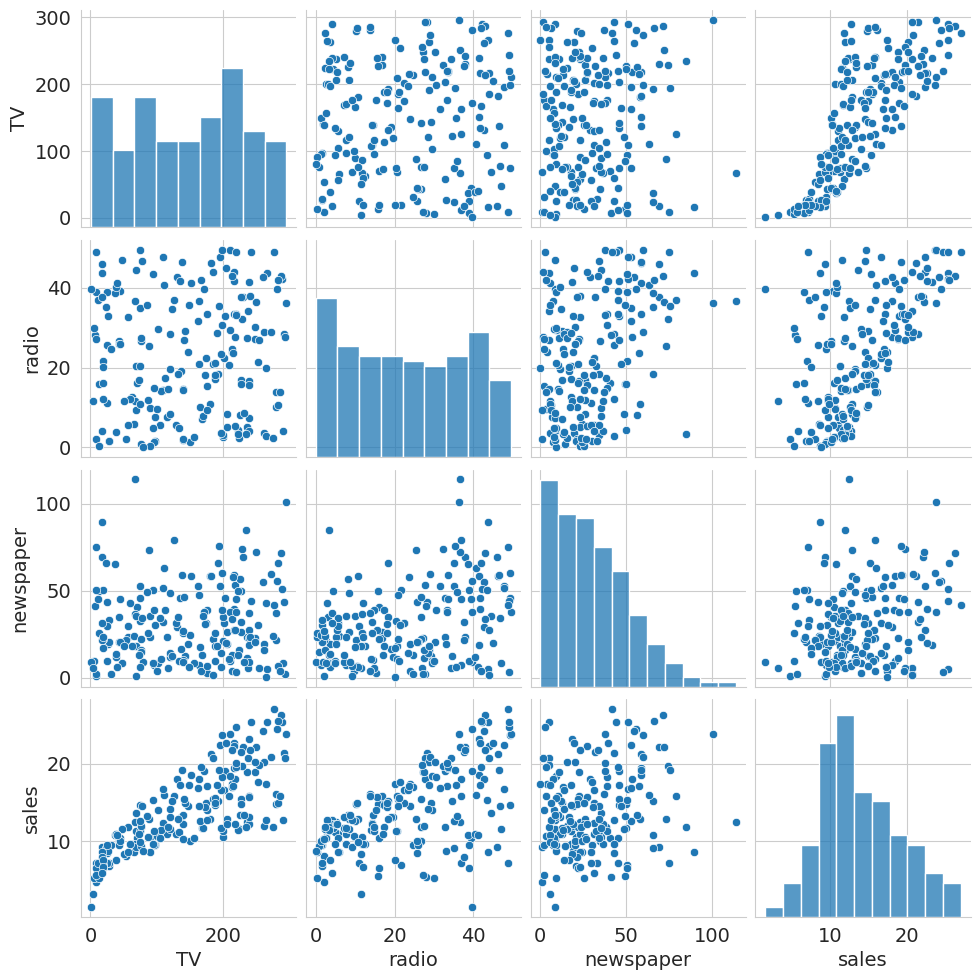

In [ ]:
sns.pairplot(adf)

<AxesSubplot:xlabel='radio', ylabel='sales'>

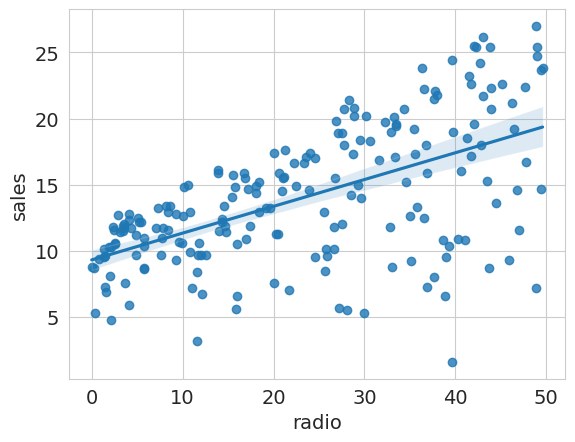

In [ ]:
sns.regplot(x = adf.radio, y = adf.sales)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

def simple_ols(xvec, yvec):
    Xadd = sm.add_constant(xvec)
    model = sm.OLS(yvec, Xadd).fit()
    return model

Text(0.5, 39.999999999999986, 'Money spent on medias')

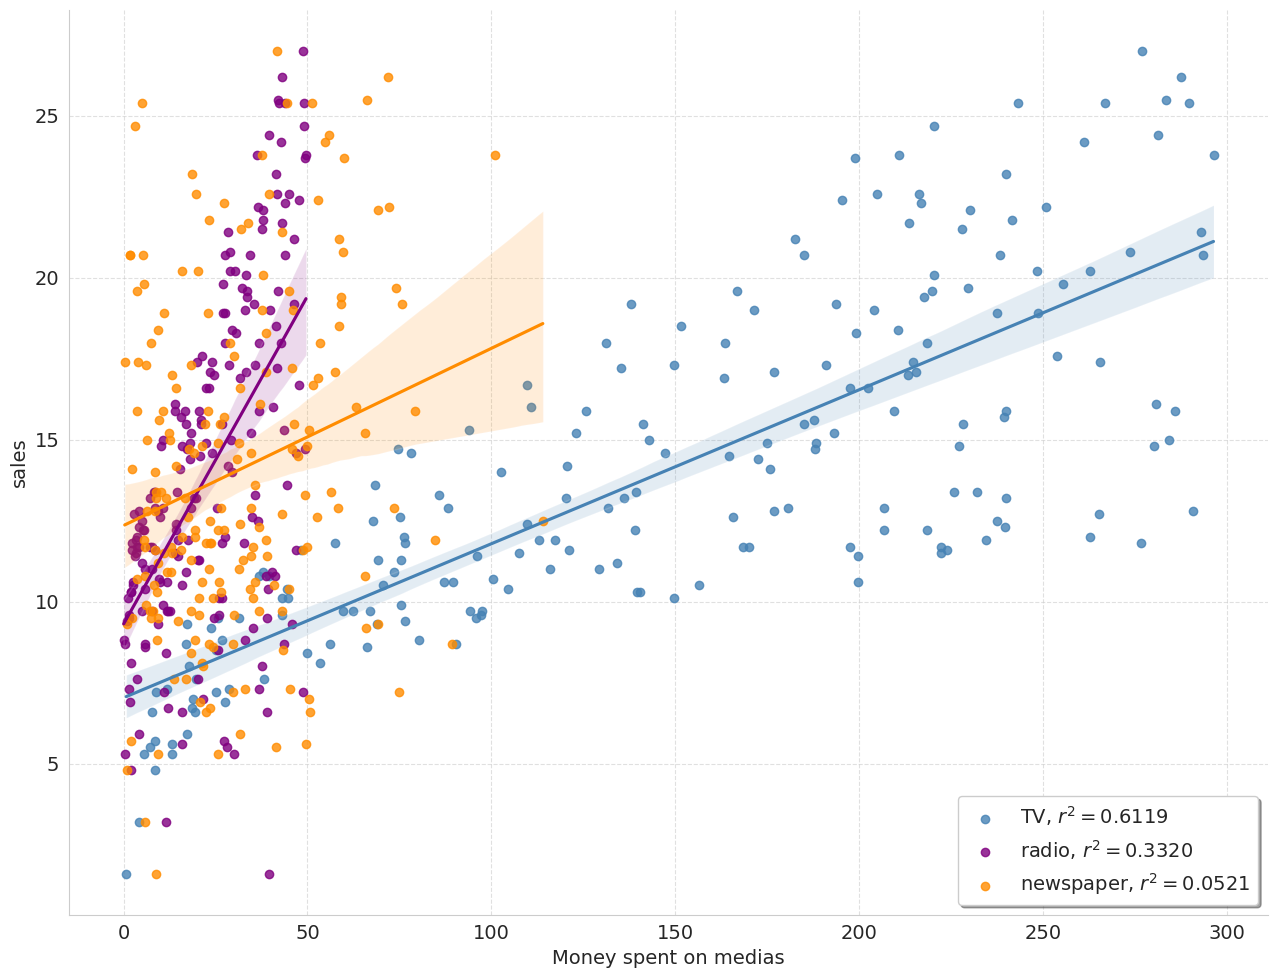

In [ ]:
from sklearn.metrics import r2_score

media = ['TV', 'radio', 'newspaper']
mcolors = ['steelblue', 'purple', 'darkorange']

g = sns.FacetGrid(adf, height=10, aspect=1.3)

for m, c in zip(media, mcolors):
    ols = simple_ols(adf[m], adf.sales)
    r2 = ols.rsquared
    g.map(sns.regplot, m, 'sales', color=c, data=adf,
        label = m + ', ' + r'$r^2=%.4f$' % r2)

plt.legend(loc='best', shadow=True, fontsize=14)
plt.grid(b='on', ls='--', alpha=0.6)
plt.xlabel('Money spent on medias')

In [ ]:
ols_full = simple_ols(adf.drop(['sales'], axis = 1), adf.sales)
print(ols_full.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           1.58e-96
Time:                        12:37:12   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [ ]:
ndf = adf.filter(['TV', 'radio'], axis = 1)
ndf['new'] = adf.TV * adf.radio
ndf.head()

ols_try = simple_ols(ndf, adf.sales)

print(ols_try.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          6.68e-146
Time:                        12:37:15   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7502      0.248     27.233      0.0

# Polynomial Regression

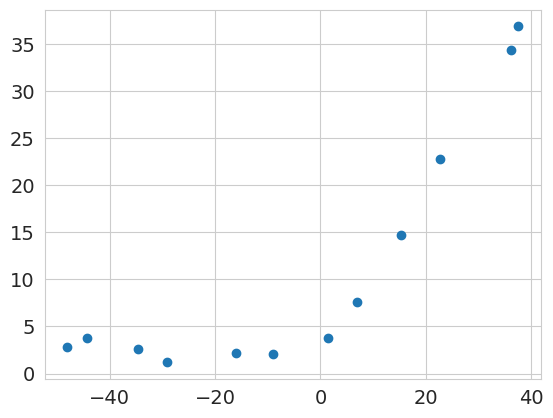

In [ ]:
X, y = aw_x,aw_y
plt.scatter(X, y)

<AxesSubplot:>

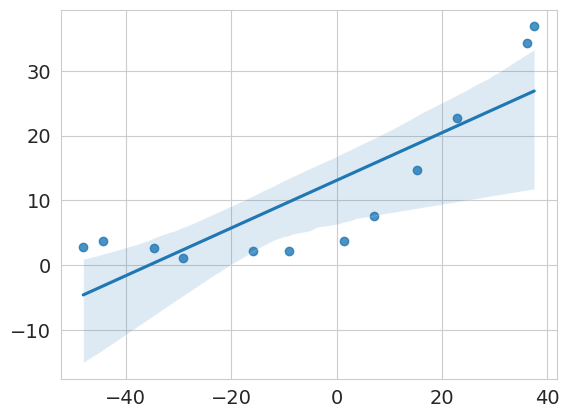

In [ ]:
sns.regplot(x = X,y = y)

## polyfit

In [ ]:
def polyfit_wrapper(xvec, yvec, deg = 3):
    p = np.polyfit(xvec.flatten(), yvec.flatten(), deg)
    return np.polyval(p, xvec.flatten()), p

In [ ]:
a = np.array([1, 2, 3])
a

array([1, 2, 3])

In [ ]:
a.reshape(-1, 1)

array([[1],
       [2],
       [3]])

In [ ]:
a[:,np.newaxis]

array([[1],
       [2],
       [3]])

## sklearn Polynomail Features()

In [ ]:
# 原本的步驟

from sklearn.preprocessing import PolynomialFeatures

# X, y
poly = PolynomialFeatures(degree=3)


X_train_poly = poly.fit_transform(X)


# X_train_poly
linear = LinearRegression()

linear.fit(X_train_poly, y)


LinearRegression()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import r2_score

# 自動化的做法

def PolynomialRegression(X, y, deg=3, xdomain = None):

    model = make_pipeline(
        PolynomialFeatures(deg, include_bias = False),
        LinearRegression()
    )
    model.fit(X, y)

    if xdomain is None:
        xdomain = np.linspace(min(X.faltten()), max(X.flatten(), 100))
    fittedvalues = model.predict(xdomain)

    return model, fittedvalues, r2_score(y, model.predict(X))


In [ ]:
xdomain = np.linspace(min(X), max(X), 100)
model, y_pred, r2 = PolynomialRegression(X, y, 5, xdomain)

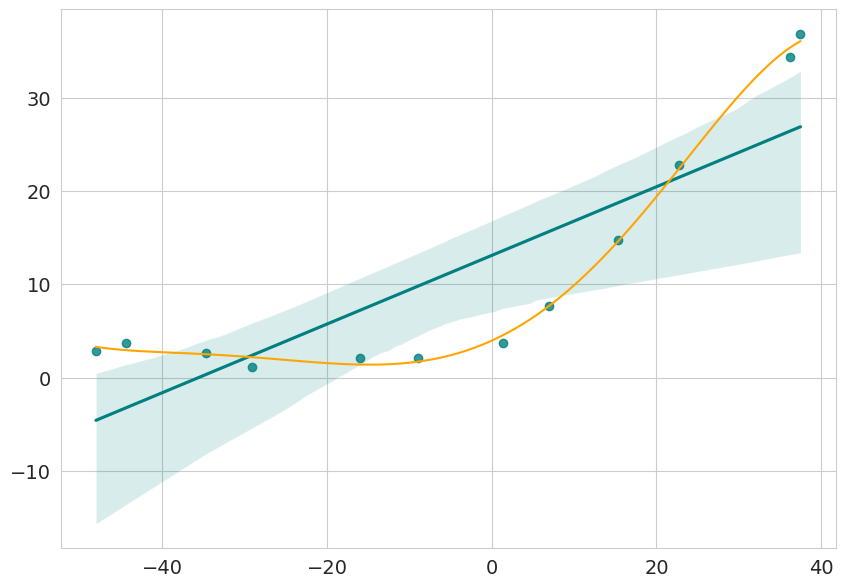

In [ ]:
fig, ax = plt.subplots(figsize=(10,7), dpi=100)

sns.regplot(x = X,y = y, color = 'teal', ax = ax)

ax.plot(xdomain, y_pred, color = 'orange')

## Taiwan.CSV

In [ ]:
# 連結已失效
# tw_csv = 'https://dl.dropboxusercontent.com/s/upr5klwy07bba3h/taiwan.csv'
# fetch_file_via_requests(tw_csv, data_dir)

In [ ]:
fetch_gdrive_file(TAIWAN_CSV, os.path.join(data_dir, 'taiwan.csv'))
rdf = pd.read_csv(os.path.join(data_dir, 'taiwan.csv'),
        parse_dates=['date'], index_col = ['date'])
rdf.tail()

Downloading...
From: https://drive.google.com/uc?id=1DKARcXADdLW5XkRuTqMhpRF97is0QrUK
To: /content/drive/My Drive/adventures/regression/taiwan.csv
100%|██████████| 4.76k/4.76k [00:00<00:00, 9.16MB/s]


,Taiwan,Local,Imported,Deaths,Recovered,Panshi
date,,,,,,
2020-06-26,447,55,356,7,435,36
2020-06-27,447,55,356,7,435,36
2020-06-28,447,55,356,7,435,36
2020-06-29,447,55,356,7,435,36
2020-06-30,447,55,356,7,435,36


In [ ]:
tdf = pd.DataFrame()
tdf['Active'] = rdf.Taiwan - rdf.Deaths - rdf.Recovered

tdf.tail()

,Active
date,
2020-06-26,5
2020-06-27,5
2020-06-28,5
2020-06-29,5
2020-06-30,5


In [ ]:
xdomain = np.arange(0, len(tdf), 1).reshape(-1, 1)
X, y = xdomain, tdf.Active

for i in [2,3,4,5,6]:
    _, y_pred, r2 = PolynomialRegression(X, y, i, xdomain)
    tdf['order=%d, r2=%.4f' % (i, r2)] = y_pred

tdf.tail()

,Active,"order=2, r2=0.5052","order=3, r2=0.5059","order=4, r2=0.7660","order=5, r2=0.7664","order=6, r2=0.8910"
date,,,,,,
2020-06-26,5,-53.928019,-49.383459,25.214459,23.059330,8.269969
2020-06-27,5,-59.372070,-54.394624,34.582138,31.551487,-1.521883
2020-06-28,5,-64.886564,-59.461601,44.811318,40.812505,-13.554621
2020-06-29,5,-70.471502,-64.584201,55.930606,50.865931,-28.060261
2020-06-30,5,-76.126884,-69.762235,67.968973,61.735525,-45.283424


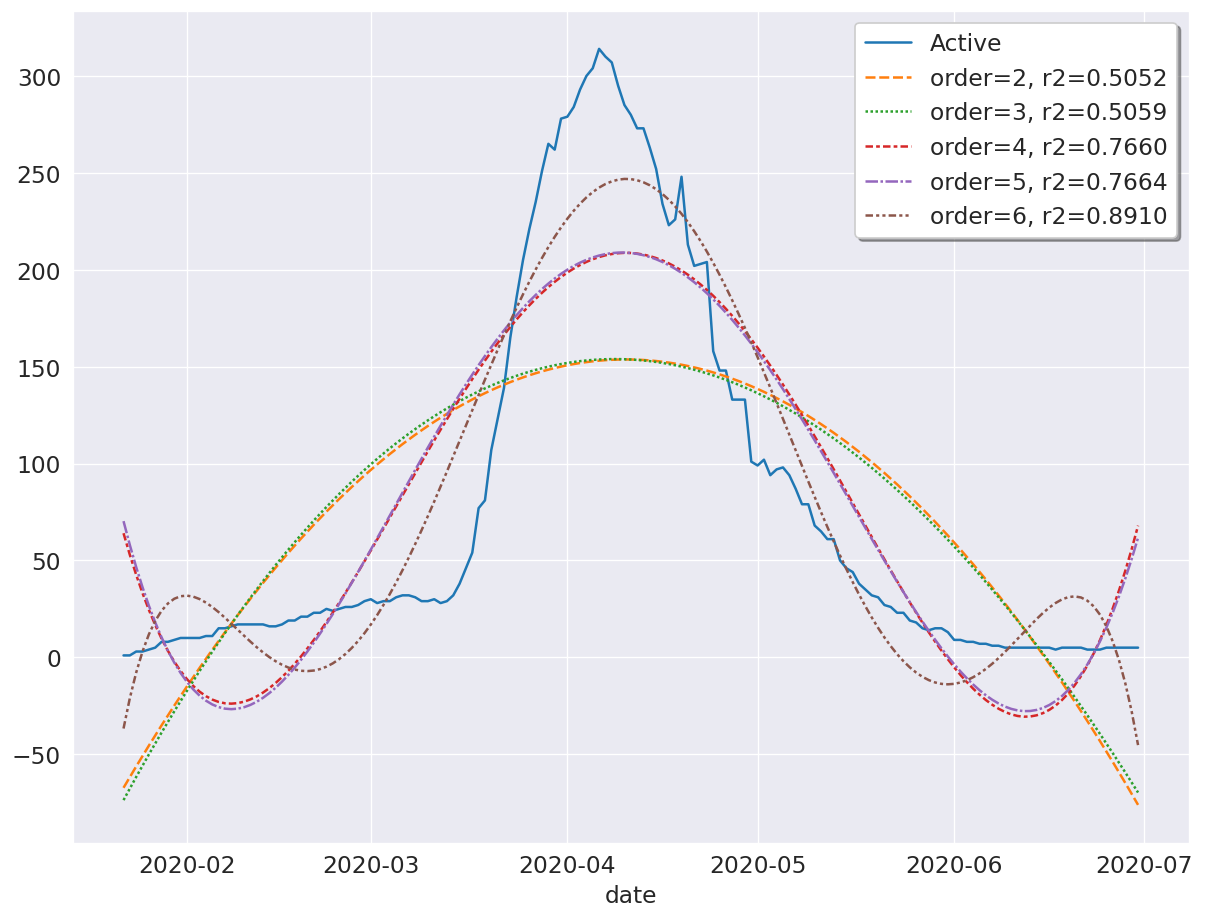

In [ ]:
sns.set_style('darkgrid')
fig,ax = plt.subplots(figsize=(12,9), dpi=120)

sns.lineplot(data=tdf, ax = ax)
ax.legend(shadow=True, facecolor = 'white', frameon=True)

# 如何繪製學習曲線

- [sklearn plot_learning_curves demo](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html)
- [sklearn learning_curve API](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve)
- [Learning curve](https://www.ritchieng.com/machinelearning-learning-curve/)

- [Evaluating Learing Algorithm](https://www.ritchieng.com/applying-machine-learning/)
- [Evaluating model performance: Generalization, Bias- Variance tradeoff and overfitting vs. underfitting |Part 2](https://www.intermediait.com/blog/2020/01/12/evaluating-model-performance-generalization-bias-variance-tradeoff-and-overfitting-vs-underfitting-part-2/)
- [YellowBrick LearningCurve](https://www.scikit-yb.org/en/latest/api/model_selection/learning_curve.html)

![High Bias](https://raw.githubusercontent.com/ritchieng/machine-learning-stanford/master/w6_ml_design/learning2.png)

![High Variance](https://raw.githubusercontent.com/ritchieng/machine-learning-stanford/master/w6_ml_design/learning3.png)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

def simple_ols(xvec, yvec):
    Xadd = sm.add_constant(xvec) # adding a constant
    model = sm.OLS(yvec, Xadd).fit()
    return model

$ y = 0.5 \times x^2 + x + 2 + randn(100,1)$

In [ ]:
m = 100
X1 = 6 * np.random.rand(m, 1) - 3
X = np.sort(X1)
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

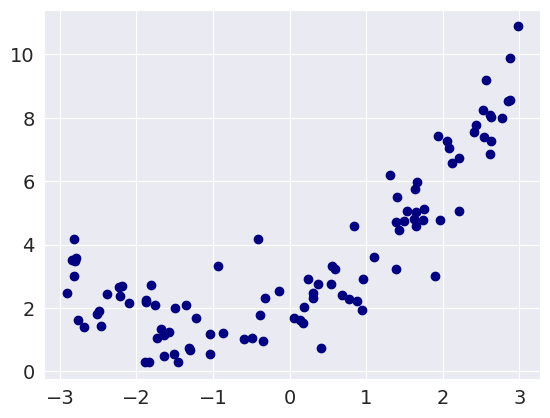

In [ ]:
plt.scatter(X, y, color = 'navy')

<AxesSubplot:>

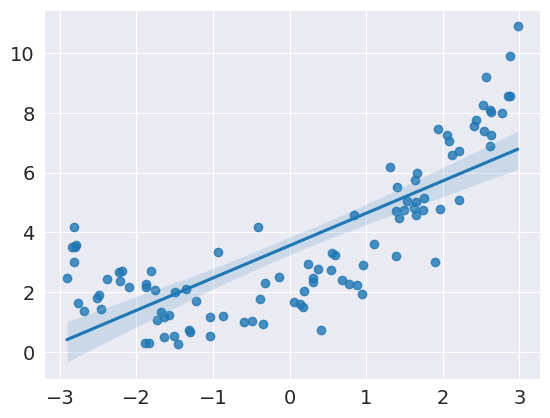

In [ ]:
sns.regplot(x = X,y = y)

In [ ]:
ols = simple_ols(X, y)
ols.rsquared

0.6061315869187083

## ## 簡化版 sklearn plot_learning_curves()

- [click here for original version](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html)

In [ ]:
from sklearn.model_selection import learning_curve

#
# Simplified version of plot_learning_curves presented in
#   https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
#

def my_plot_leaning_curves(model, X, y, cv=None, scoring = None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):


    fig,ax = plt.subplots(figsize = (10, 8))
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(model, X, y, cv=cv, n_jobs=n_jobs,
                scoring = scoring,
                train_sizes=train_sizes,
                return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    ax.grid()
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    ax.legend(loc="best")

## How to use

In [ ]:
X.shape, y.shape

((100, 1), (100, 1))

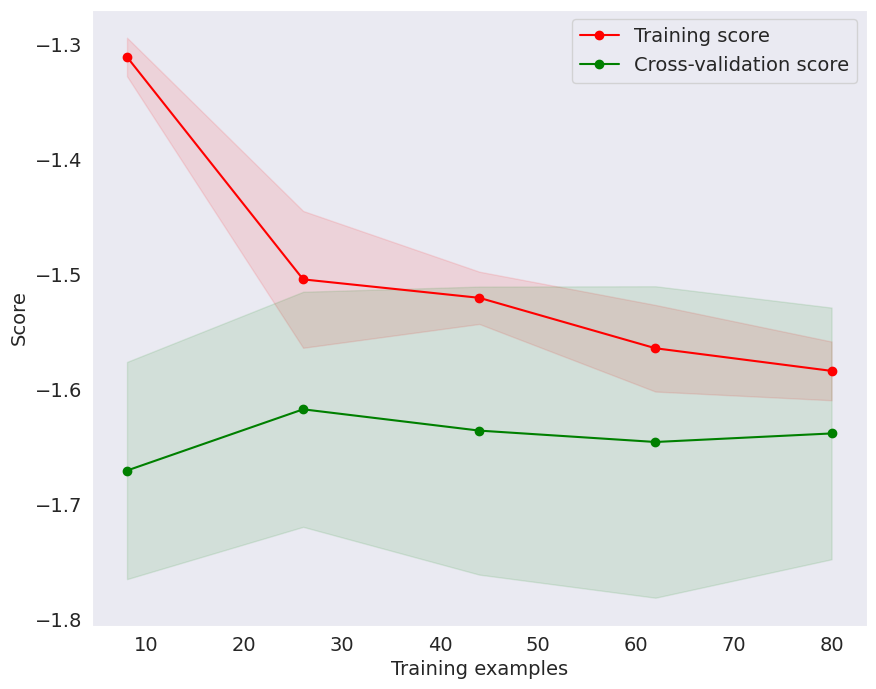

In [ ]:
from sklearn.linear_model import LinearRegression

linr = LinearRegression()

my_plot_leaning_curves(linr, X, y,
    scoring='neg_root_mean_squared_error')

In [ ]:
for x in sklearn.metrics.SCORERS.keys():
    print(x)

explained_variance
r2
max_error
matthews_corrcoef
neg_median_absolute_error
neg_mean_absolute_error
neg_mean_absolute_percentage_error
neg_mean_squared_error
neg_mean_squared_log_error
neg_root_mean_squared_error
neg_mean_poisson_deviance
neg_mean_gamma_deviance
accuracy
top_k_accuracy
roc_auc
roc_auc_ovr
roc_auc_ovo
roc_auc_ovr_weighted
roc_auc_ovo_weighted
balanced_accuracy
average_precision
neg_log_loss
neg_brier_score
adjusted_rand_score
rand_score
homogeneity_score
completeness_score
v_measure_score
mutual_info_score
adjusted_mutual_info_score
normalized_mutual_info_score
fowlkes_mallows_score
precision
precision_macro
precision_micro
precision_samples
precision_weighted
recall
recall_macro
recall_micro
recall_samples
recall_weighted
f1
f1_macro
f1_micro
f1_samples
f1_weighted
jaccard
jaccard_macro
jaccard_micro
jaccard_samples
jaccard_weighted


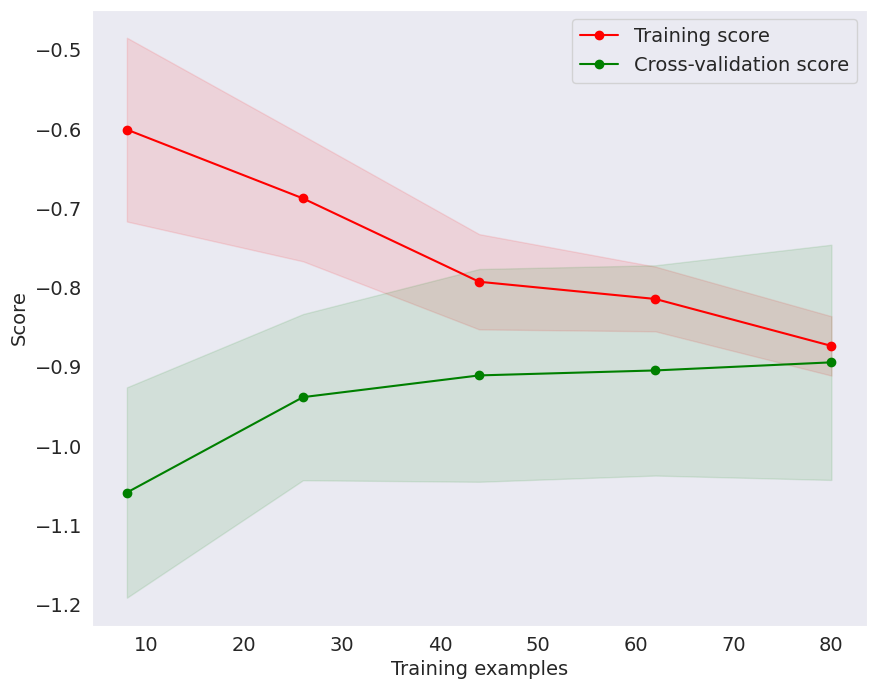

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline

model = make_pipeline(
    PolynomialFeatures(2, include_bias=False),
    LinearRegression()
)

my_plot_leaning_curves(model, X, y,
    scoring='neg_root_mean_squared_error')


## DIY considerations

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

def learning_curve_data(model, X, y):
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size = 0.2, random_state = 0)
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))

    return train_errors, test_errors

def reg_lr_curve(model, X, y):
    train, val = learning_curve_data(model, X, y)

    sns.set_style('darkgrid')
    fig,ax = plt.subplots(figsize=(8,6))
    sns.lineplot(x = range(len(train)),y = -np.sqrt(train), ax = ax, color ='brown' )
    sns.lineplot(x = range(len(train)),y = -np.sqrt(val), ax = ax)
    ax.legend(
        ['Train Error','Validation Error'],
        shadow=True, frameon=True, fontsize = 14, facecolor ='white')
    ax.set_ylabel('-RMSE')
    ax.set_xlabel('Training Size')

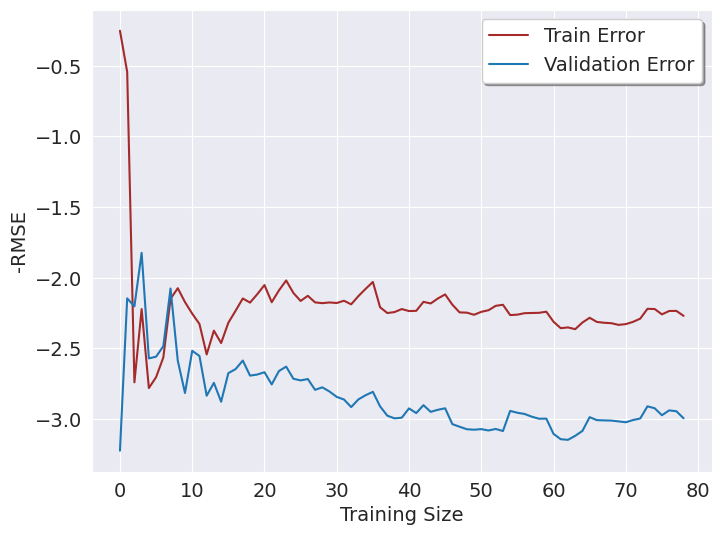

In [ ]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()

reg_lr_curve(linr, X, y)


# Regularized Models

$y = 1 + 0.5 \times \frac{randn(20,1)}{1.5}$

In [ ]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

<AxesSubplot:>

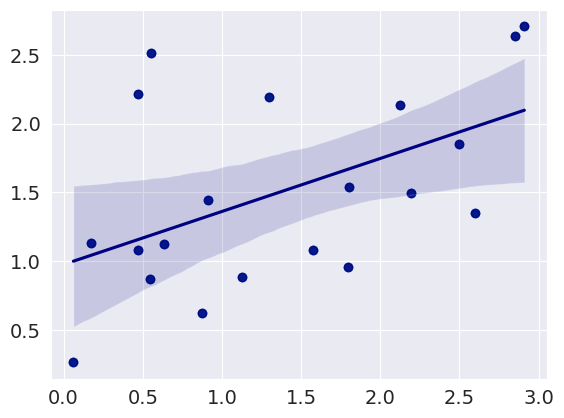

In [ ]:
plt.scatter(X, y)
sns.regplot(x = X, y = y, color='navy')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lin = LinearRegression()
lin.fit(X, y)
yhat = lin.predict(X)
r2 = r2_score(y, yhat)
mse = mean_squared_error(y, yhat)
r2, mse

(0.25845207303751283, 0.3446263664309721)

## useful imports

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler

## r2 = 0.258, mse = 0.345

## Ridge

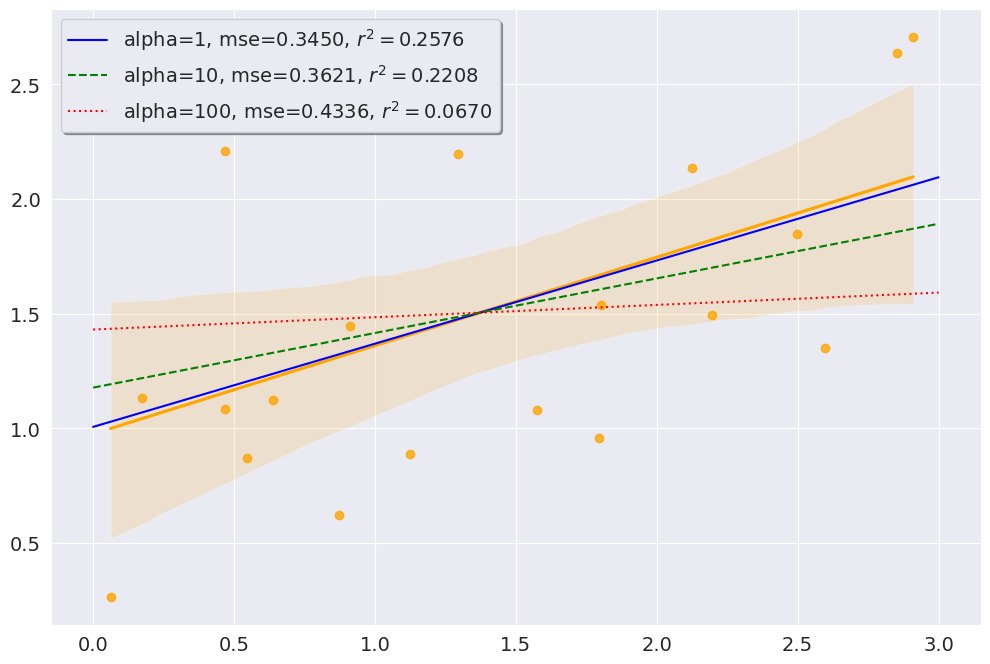

In [ ]:
alphas = [1, 10, 100]
styles = ['b-', 'g--', 'r:']

fig, ax = plt.subplots(figsize=(12, 8))
sns.set_style('darkgrid')
sns.regplot(x = X,y = y, color='orange')

for alpha_value, line_style in zip(alphas, styles):
    model = Ridge(alpha_value)
    model.fit(X, y)
    yline = model.predict(X_new)
    yr2 = model.predict(X)
    r2 = r2_score(y, yr2)
    mse = mean_squared_error(y, yr2)
    ax.plot(X_new, yline, line_style,
        label = 'alpha=%d, ' % alpha_value +
        'mse=%.4f, ' % mse +
        r'$r^2=%.4f$' % r2)
ax.legend(loc ='upper left', fancybox = True, shadow=True,
    frameon=True, fontsize=14)

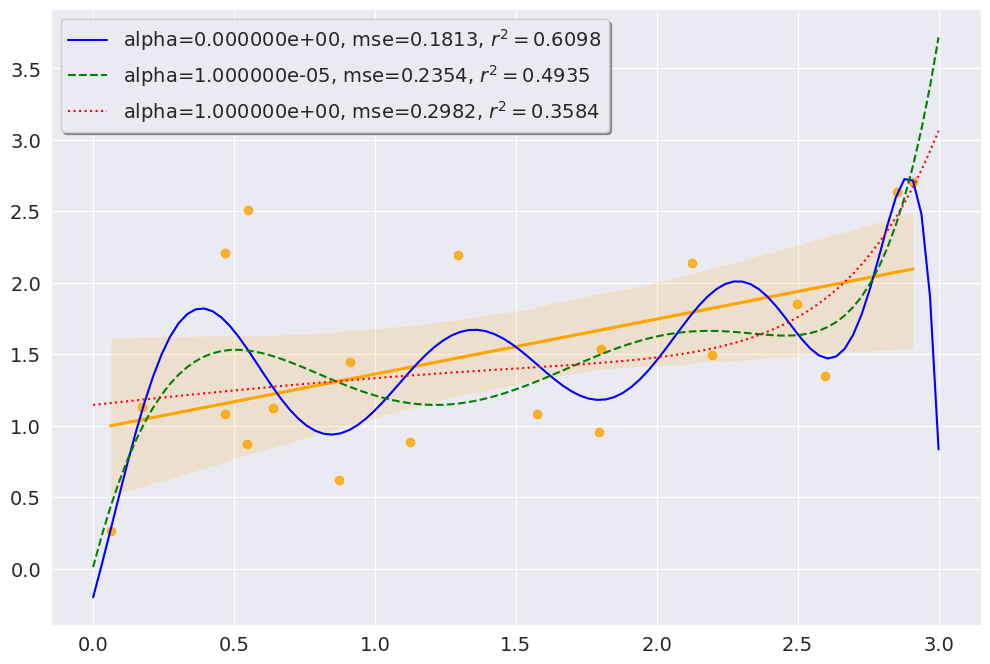

In [ ]:
alphas = [0, 10**-5, 1]
styles = ['b-', 'g--', 'r:']

fig, ax = plt.subplots(figsize=(12, 8))
sns.set_style('darkgrid')
sns.regplot(x = X,y = y, color='orange')

for alpha_value, line_style in zip(alphas, styles):
    # model = Ridge(alpha_value)
    model = make_pipeline(
        PolynomialFeatures(degree=10, include_bias=False),
        StandardScaler(),
        Ridge(alpha_value)
    )
    model.fit(X, y)
    yline = model.predict(X_new)
    yr2 = model.predict(X)
    r2 = r2_score(y, yr2)
    mse = mean_squared_error(y, yr2)
    ax.plot(X_new, yline, line_style,
        label = 'alpha=%e, ' % alpha_value +
        'mse=%.4f, ' % mse +
        r'$r^2=%.4f$' % r2)
ax.legend(loc ='upper left', fancybox = True, shadow=True,
    frameon=True, fontsize=14)

## Lasso

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coor

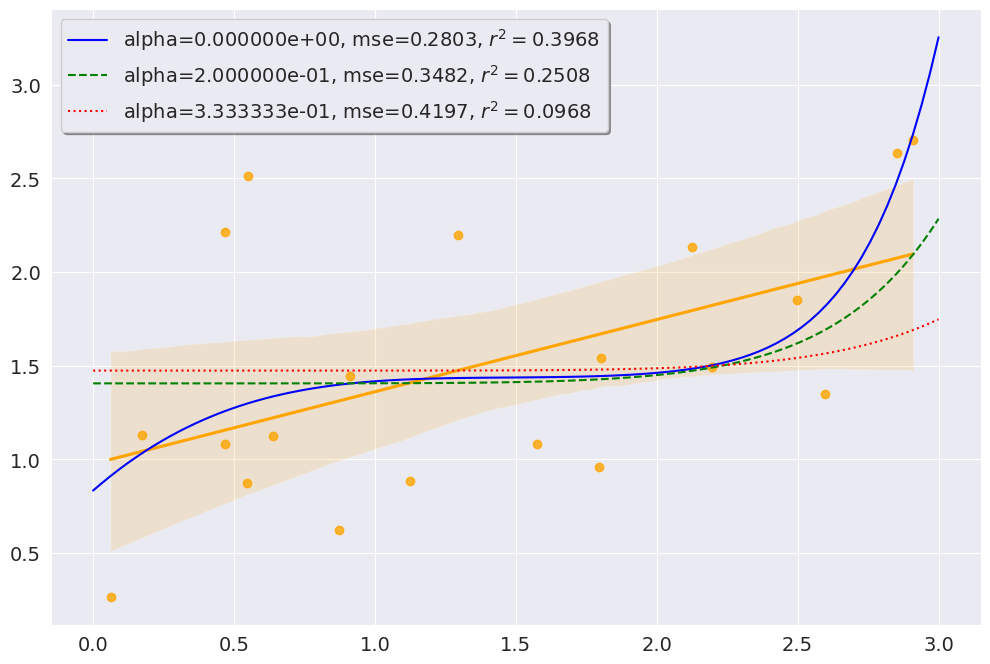

In [ ]:
alphas = [0, 5**-1, 3**-1]
styles = ['b-', 'g--', 'r:']

fig, ax = plt.subplots(figsize=(12, 8))
sns.set_style('darkgrid')
sns.regplot(x = X,y = y, color='orange')

for alpha_value, line_style in zip(alphas, styles):

    model = make_pipeline(
        PolynomialFeatures(degree=10, include_bias=False),
        StandardScaler(),
        Lasso(alpha_value)
    )
    model.fit(X, y)
    yline = model.predict(X_new)
    yr2 = model.predict(X)
    r2 = r2_score(y, yr2)
    mse = mean_squared_error(y, yr2)
    ax.plot(X_new, yline, line_style,
        label = 'alpha=%e, ' % alpha_value +
        'mse=%.4f, ' % mse +
        r'$r^2=%.4f$' % r2)
ax.legend(loc ='upper left', fancybox = True, shadow=True,
    frameon=True, fontsize=14)